# 워드 클라우드 및 자연어 처리

In [1]:
# import nltk 
# # punkt, stopwords download
# nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [137]:
import pandas as pd
import numpy as np
import copy
import os
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.family'] = 'NanumGothicCoding'
import nltk
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
import re, joblib
import konlpy
from konlpy.tag import Okt 
okt = Okt()
import string
import threading

In [42]:
os.chdir('/home/miwoos/WorkSpace/GoogleDrive/제주_전기차/data/')

In [44]:
ls

 elecafe.csv
'pietest (df1798e6) (d8200025) (d8200025).png'
'pietest (df1798e6) (df1798e6) (df1798e6) (df1798e6).png'
 관련키워드.csv
'긍부정 (4de45444) (4de45444).png'
 네이버-제주전기차후기통합.csv
 느영나영전기차크롤링.csv
 느영나영전기차크롤링.csv.part
'본문 검색 결과_2022.03.06.xlsx'
'전기차 동호회 전기차크롤링.csv'
 전기차관련검색어인기순.csv
 전기차관심도지역.csv
 전기차관심증가.csv
 전기차키워드관련주제인기순.csv
 전체본문의댓글결과_2022.03.06.xlsx
 제사모크롤링.csv
 투플럭스sjeju.csv


In [45]:
df_naver= pd.read_csv('네이버-제주전기차후기통합.csv')

In [9]:
df = pd.read_csv('/home/miwoos/WorkSpace/GoogleDrive/제주_전기차/data/elecafe.csv')

In [107]:
df_toflux= pd.read_csv('본문 검색 결과_2022.03.06.xlsx')

In [124]:
df_tofluxfull= pd.read_excel('/home/miwoos/WorkSpace/Jeju_Electric_Vehicle_analysis/본문 검색 결과_2022.03.06.xlsx')

In [126]:
df_tofluxfull.Contents

0         ▶ 아이오닉5 휠베이스 3000의 가치_x000D_\n_x000D_\n서비스센터 갔...
1         ▶ 현대차 아이오닉5 vs 테슬라 모델Y, 뭘 살까요?_x000D_\n_x000D_...
2         ▶ (완판) 2020.5 롯데렌터카 신차장! 테슬라프로모션 105대 공지드립니다. ...
3         ▶ 코나ev 충전중 화재로 전손 됬습니다_x000D_\n_x000D_\n안녕하세요,...
4         ▶ 전기차충전요금 원복및 조속한 충전인프라확충에대한 국민청원을 진행하려니 읽어보셔요...
                                ...                        
394815    ▶ C40 대기순번 문의_x000D_\n_x000D_\n* 관련된 주제에 대해 미리...
394816    ▶ 와.. 진짜 미­쳣나봐요 ㅋㅋ_x000D_\n_x000D_\n쿠­팡이 드디어 미...
394817    ▶ 니로 ev 회생제동 질문_x000D_\n_x000D_\n안녕하세요 니로 ev 중...
394818    ▶ 가입인사 드립니다_x000D_\n_x000D_\n1. 자기소개 : 안녕하세요~e...
394819    ▶ 취소차 문의드립니다._x000D_\n_x000D_\n* 관련된 주제에 대해 미리...
Name: Contents, Length: 394820, dtype: object

In [120]:
df_toflux.head(3)

,제목,카페명,작성날짜,내용,조회수,긍부정,Url,월,년
0,전기차충전요금 원복및 조속한 충전인프라확충에대한 국민청원을 진행하려니 읽어보셔요~(...,전기차동호회,2020-05-13 15:19:00,▶ 전기차충전요금 원복및 조속한 충전인프라확충에대한 국민청원을 진행하려니 읽어보셔요...,2461,P,https://cafe.naver.com/allfm01/463393,2020.05,2020
1,코나 급발진 실화냐,전기차동호회,2021-03-04 21:15:00,▶ 코나 급발진 실화냐_x000D_\n_x000D_\n주차 차단기 뚫고 쾅…전기차도...,753,N,https://cafe.naver.com/allfm01/577259,2021.03,2021
2,약930일을 운행한 후에 운행하면서 느낀점을 수정 추가해서 적어보았습니다 2020년...,전기차동호회,2020-01-03 04:57:00,▶ 약930일을 운행한 후에 운행하면서 느낀점을 수정 추가해서 적어보았습니다 202...,690,P,https://cafe.naver.com/allfm01/413286,2020.01,2020


In [5]:
pwd

'/home/miwoos/WorkSpace/Jeju_Electric_Vehicle_analysis'

In [35]:
df.카페명.unique()

array(['제사모', '느영나영', '전기차동호회'], dtype=object)

In [36]:
df[df.카페명=='전기차동호회']

,제목,내용,댓글,유형,조회수,작성날짜,월별,카페명,년별
3566,금융치료,완료하였습니다. \n나라에 세금이나 좀 더 충당해라..\n,크~~~ 정의구현에 마음이 시원해집니다 ㅎ\n^^\n번호가리세요!!\n헉 고맙습니다...,제주특별자치도,"6,136",2022.02.25.,2022.02,전기차동호회,2022
3567,경부하시간 차이,육지랑 제주랑 경부하시간이 다르더라고요.\n육지는 11시부터 9시.\n제주는 10시...,제주도는 하루일과를 일찍 시작해서 일찍 끝내서가 아닐까요?\n참고로 저는14년부터 ...,제주특별자치도,"6,776",2022.03.04.,2022.03,전기차동호회,2022
3568,제주도 여행지 추천 부탁드립니다.,제가 결혼기념일 즈음하고 \n얼마전 인연을 맺은 사돈내외와 제주도 여행을 하려고 합...,제주 가시면 해돋이보러 성산 일출봉 꼭 가보셔요. 한해에 해돋이 볼수 있는 날은 얼...,제주특별자치도,"1,973",2022.03.14.,2022.03,전기차동호회,2022
3569,제주 폴스타,제주도 폴스타 오픈예정이던대 \n\n정확한 시기는 안나온건가요?\n\n혹시 카페에서...,제주매장은 언제 예정인지는 잘모르겠네요\n\n사전계약자들중 기존 생산물량 잡은신분들...,제주특별자치도,742,2022.03.14.,2022.03,전기차동호회,2022
3570,경매에 BMW i3가 왕창 나왔네요~,http://www.jejusori.net/news/articleView.html?...,수리해서 탈만한차는 몇없을거에요\n그니깐요~\n저렇게 처리할 보조금 있으면…\n좋은...,제주특별자치도,944,2022.03.12.,2022.03,전기차동호회,2022
...,...,...,...,...,...,...,...,...,...
5910,[링크스크랩] 100% 순수 전기차 ‘SM3 Z.E.’ 보급 위해 특별 할인 제공,출처\n뉴스>동아일보 | 네이버 뉴스,정부 보조금 까지 받게 된다면 엄청 싸게 살수 있겠네요....서울에서 다시 보조금 ...,제주특별자치도,111,2015.03.08.,2015.03,전기차동호회,2015
5911,"[링크스크랩] 자동차 업계, 제주도 전기차 민간 보급 공모 총력전…가격 인하 이어져",출처\n뉴스>전자신문 | 네이버 뉴스,쏘울 내일 받는데 100만원 낮아지다니....ㅠㅠ\n서울도 다시한번더 보조금 지원하...,제주특별자치도,84,2015.03.04.,2015.03,전기차동호회,2015
5912,등업부탁해요 하반기 전기차를 신청하고싶었는데,하반기 전기차를 신청하고싶었는데\n주차장문제로 못하로 내년 상반기를 기대합니다\n등...,반가워요~~😊\n내년에 제주도 전기차 공급량이 대박이던데 좋은소식 있으시길...\n...,제주특별자치도,76,2014.10.26.,2014.10,전기차동호회,2014
5913,ㅇㅇ,ㅇ,0\n,제주특별자치도,35,2014.06.21.,2014.06,전기차동호회,2014


In [134]:
df.head(3)

,제목,내용,댓글,유형,조회수,작성날짜,월별,카페명,년별
0,봉고3더블캡,"※ 보다 투명하고, 빠른 거래를 위하여 아래의 글 양식을 준수하여 주세요. ※ \n...",가격이 궁금해요..^^\n얼마인가요ㅡ\n,제사모 중고장터,130,2022.03.16.,2022.03,제사모,2022
1,렌트카 알아보고 있는데 lpg 차량이 저렴한 이유가 뭘까요?,육지에서 이번주 토욜부터 제주 한달살이 시작하면서. 렌트카 알아보고 있어요. 육지에...,요즘 전기차가 대세기도 하지만 가스값 장난아니게 올랏어요...또한 한달살기라면 자차...,Q. 종합 질문방,161,2022.03.16.,2022.03,제사모,2022
2,더 뉴 아이오닉 일렉트릭N 20년형 흰색7만 현대스마트센스 l추가 완전무사고/믿고사...,★ 차량 정보 ★\n\n▶▷모델명 : 더 뉴 아이오닉 일렉트릭 N 전기차\n\n▶▷...,내용없음,중고자동차 매물,62,2022.03.16.,2022.03,제사모,2022


In [89]:
'hi.'.strip(string.punctuation())

TypeError: 'str' object is not callable

In [127]:
userwant = df_tofluxfull.Contents.copy()
userwant.dropna(inplace=True)
userwant.reset_index(inplace=True,drop=True)
userwant_list=userwant.values


sum_list = []
for i in range(len(userwant_list)):
    sum_list+=userwant_list[i].replace(string.punctuation,'').split(' ')
len(sum_list)


19719996

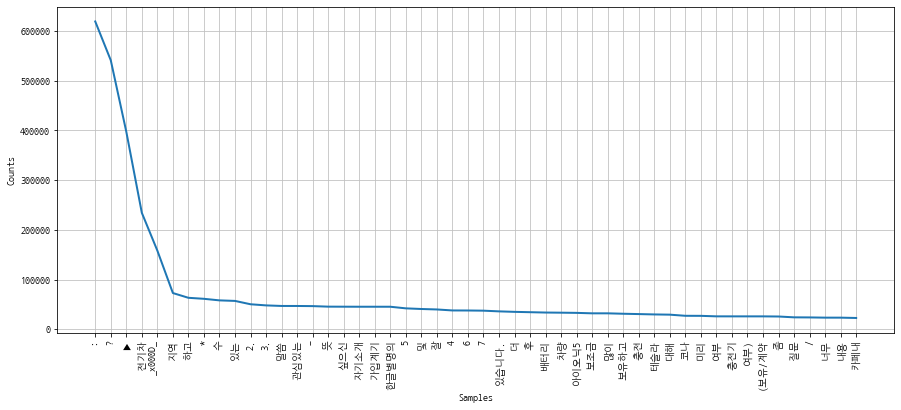

<Figure size 432x288 with 0 Axes>

In [135]:
elc_use = nltk.Text(sum_list, name='내용')
plt.figure(figsize=(15,6))
elc_use.plot(50)
plt.show()
plt.savefig('빈도수파악.png')

In [130]:
data = elc_use.vocab().most_common(300)
data

[(':', 619277),
 ('?', 541187),
 ('▶', 397427),
 ('전기차', 234235),
 ('_x000D_\n', 158139),
 ('지역', 72809),
 ('하고', 63251),
 ('*', 61226),
 ('수', 58067),
 ('있는', 56987),
 ('2.', 50253),
 ('3.', 47980),
 ('말씀', 46836),
 ('관심있는', 46802),
 ('-', 46526),
 ('뜻', 45450),
 ('싶으신', 45358),
 ('자기소개', 45273),
 ('가입계기', 45269),
 ('한글별명의', 45268),
 ('5', 42022),
 ('및', 40735),
 ('잘', 39791),
 ('4', 37800),
 ('6', 37703),
 ('7', 37357),
 ('있습니다.', 35956),
 ('더', 34977),
 ('후', 34291),
 ('배터리', 33592),
 ('차량', 33303),
 ('아이오닉5', 32921),
 ('보조금', 32012),
 ('많이', 32008),
 ('보유하고', 31161),
 ('충전', 30501),
 ('테슬라', 29782),
 ('대해', 29330),
 ('코나', 27038),
 ('미리', 26946),
 ('여부', 25932),
 ('충전기', 25904),
 ('여부)', 25896),
 ('(보유/계약', 25891),
 ('좀', 25618),
 ('질문', 23947),
 ('/', 23771),
 ('너무', 23323),
 ('내용', 23309),
 ('카페내', 22659),
 ('관련된', 22035),
 ('검색해', 21669),
 ('주제에', 21485),
 ('보셨습니까?', 21447),
 ('종류,', 21439),
 ('혹시', 20538),
 ('제가', 20162),
 ('아이오닉', 19900),
 ('그냥', 19634),
 ('정보', 19350),
 ('합니다

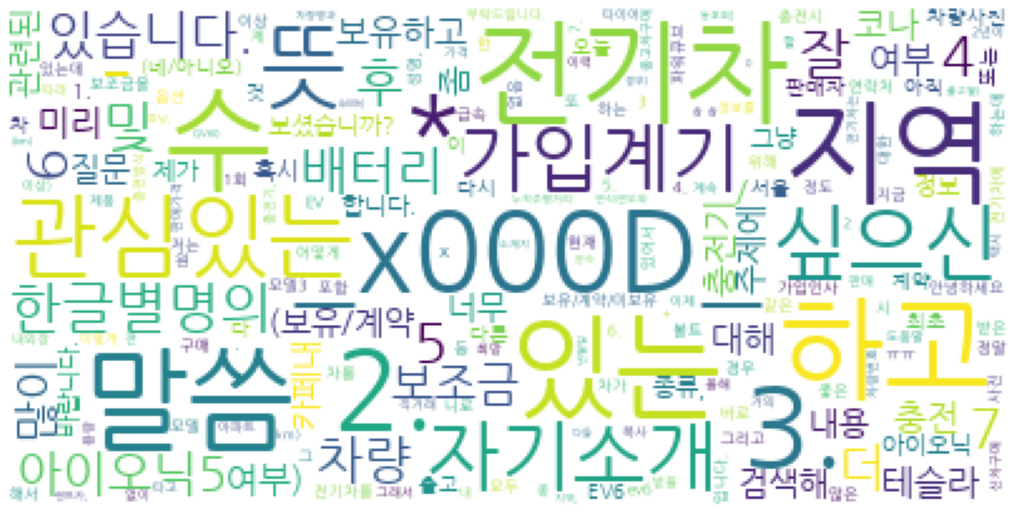

<Figure size 432x288 with 0 Axes>

In [136]:
wc = WordCloud(
    font_path='NanumGothic.ttf',
    relative_scaling=0.00001,
    background_color='white'
).generate_from_frequencies(dict(data[3:]))

plt.figure(figsize=(18,12))
plt.imshow(wc)
plt.axis('off')
plt.show()
plt.savefig('elc_usewordcloud.png')

In [113]:
from konlpy.tag import Okt 